In [124]:
import re
import os
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from Bio import SeqIO, Entrez
import py3Dmol

from dotenv import load_dotenv
env_file = '/home/yuan/bio/bio_omics/src/.env'
load_dotenv(dotenv_path = env_file)

%load_ext autoreload
%autoreload 2

src_dir = os.path.dirname(os.getcwd())
print('src direcotry is ', src_dir)
bioomics_dir = '/home/yuan/bio/bio_omics/src'
for _dir in (src_dir, bioomics_dir):
    if _dir not in sys.path:
        sys.path.append(_dir)
print(sys.path)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
src direcotry is  /home/yuan/bio/predict_antibody
['/home/yuan/bio/anaconda3/envs/simulate/lib/python39.zip', '/home/yuan/bio/anaconda3/envs/simulate/lib/python3.9', '/home/yuan/bio/anaconda3/envs/simulate/lib/python3.9/lib-dynload', '', '/home/yuan/bio/anaconda3/envs/simulate/lib/python3.9/site-packages', '/home/yuan/bio/predict_antibody', '/home/yuan/bio/bio_omics/src']


In [125]:
from bioomics import QueryComplex, DistanceAnalyze, DistanceProcess
from layout import Layout
from plot_predict import PlotPredict
from load_data import LoadData

## 1. prediction

### 1.1 pLDDt and pTM by alphafold

In [3]:
df = LoadData.chain_afsum()

INFO:mysql.connector:package: mysql.connector.plugins
INFO:mysql.connector:plugin_name: caching_sha2_password
INFO:mysql.connector:AUTHENTICATION_PLUGIN_CLASS: MySQLCachingSHA2PasswordAuthPlugin


antibody, pdb:  8737
antibody, chains: 29089
(17027, 27)
{'predict_id': 39, 'chain_id': '3IJH_0_A_0', 'ranking': 1, 'avg_plddt': 97.7048, 'avg_ptm': 0.88, 'max_pae': 20.5938, 'relative_json': 'chain_alphafold/3I/3IJH/3IJH_0_A_0/3IJH_0_A_0_scores_rank_001_alphafold2_ptm_model_2_seed_042.json', 'relaxed_pdb': 'chain_alphafold/3I/3IJH/3IJH_0_A_0/3IJH_0_A_0_relaxed_rank_001_alphafold2_ptm_model_2_seed_042.pdb', 'unrelaxed_pdb': 'chain_alphafold/3I/3IJH/3IJH_0_A_0/3IJH_0_A_0_unrelaxed_rank_001_alphafold2_ptm_model_2_seed_042.pdb', 'allele_name': 'IGKV8-21*01', 'specie': 'Mus_musculus', 'gene_name': 'IGKV8-21', 'gene_family': 'IGKV8', 'chain_type': 'Kappa', 'pdb_id': '3IJH', 'model_no': 0.0, 'chain_no': 'A', 'pro_id': 143006.0, 'chain_seq': 'IVMTQSPSSLAVSAGEKVTMSCKSSQSLLNSRTRKNYLAWYQQKPGQSPKLLIYWASTRESGVPDRFTGSGSGTDFTLTISSVQAEDLAVYYCKQSNNLRTFGGGTKLEIKRADAAPTVSIFPPSSEQLTSGGASVVCFLNNFYPKDINVKWKIDGSERQNGVLNSWTDQDSKDSTYSMSSTLTLTKDEYERHNSYTCEATHKTSTSPIVKSFNRNE', 'pro_len': 217.0, 'release_date': 

figure size: 8.5 x 6 cm


<Axes: xlabel='Average pLDDT', ylabel='Chain'>

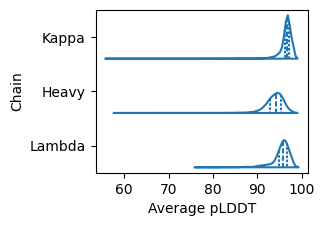

In [107]:
# model confidence
args = {'width_level':1, 'height':6}
fig, ax = Layout(args).one()

PlotPredict(df).violin_plddt(ax)

figure size: 8.5 x 6 cm


<Axes: xlabel='Average pTM', ylabel='Chain'>

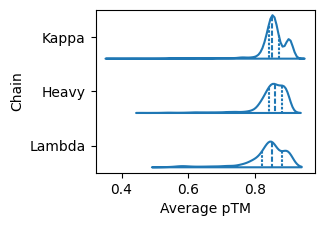

In [108]:
# model confidence
args = {'width_level':1, 'height':6}
fig, ax = Layout(args).one()

PlotPredict(df).violin_ptm(ax)

figure size: 11.4 x 7 cm


<Axes: xlabel='Average pLDDT', ylabel='Average pTM'>

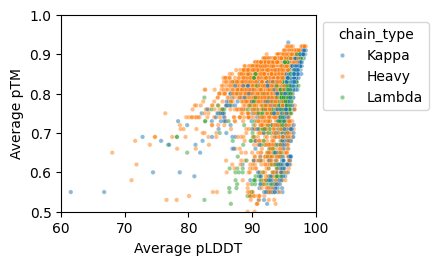

In [109]:
# compare pLDDT with pTM
args = {'width_level':2, 'height':7}
fig, ax = Layout(args).one()

PlotPredict(df).dot_plddt_ptm(ax)

figure size: 8.5 x 6 cm
intercept=-0.23662227657397103, slope=0.011567455170199555


<Axes: title={'center': '$R^2$=0.2573'}, xlabel='Average pLDDT', ylabel='Average pTM'>

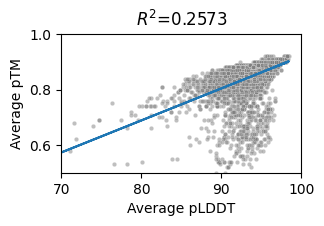

In [110]:
# compare pLDDT with pTM
args = {'width_level':1, 'height':6}
fig, ax = Layout(args).one()

chain_type = 'Heavy'
PlotPredict(df).dot_chain_plddt_ptm(ax, chain_type)

figure size: 8.5 x 6 cm
intercept=-0.7138518304803633, slope=0.01622969704440691


<Axes: title={'center': '$R^2$=0.3742'}, xlabel='Average pLDDT', ylabel='Average pTM'>

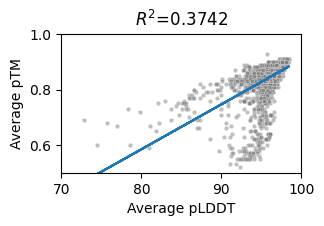

In [111]:
# compare pLDDT with pTM
args = {'width_level':1, 'height':6}
fig, ax = Layout(args).one()

chain_type = 'Kappa'
PlotPredict(df).dot_chain_plddt_ptm(ax, chain_type)

figure size: 8.5 x 6 cm
intercept=-1.0515700243895543, slope=0.019772275725455493


<Axes: title={'center': '$R^2$=0.4372'}, xlabel='Average pLDDT', ylabel='Average pTM'>

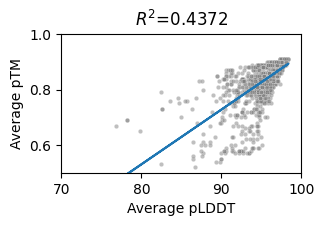

In [112]:
# compare pLDDT with pTM
args = {'width_level':1, 'height':6}
fig, ax = Layout(args).one()

chain_type = 'Lambda'
PlotPredict(df).dot_chain_plddt_ptm(ax, chain_type)

figure size: 17.4 x 12 cm
intercept=-0.23662227657397103, slope=0.011567455170199555
intercept=-0.7138518304803633, slope=0.01622969704440691
intercept=-1.0515700243895543, slope=0.019772275725455493


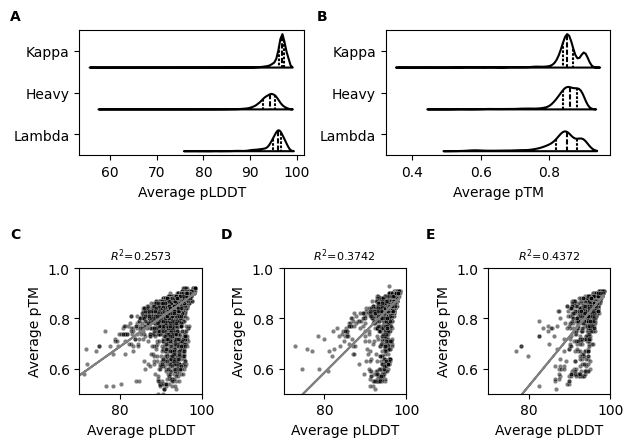

In [62]:
args = {'width_level':3, 'height':12, 'wspace':4, 'hspace':.9}
panel_xytext= [(-50,15),(-50,15),(-50,30),(-45,30),(-45,30),]
fig, axes = Layout(args).row2_row3(panel_xytext)

PlotPredict(df).violin_plddt(axes[0])
PlotPredict(df).violin_ptm(axes[1])
chain_type = 'Heavy'
PlotPredict(df).dot_chain_plddt_ptm(axes[2], chain_type)
chain_type = 'Kappa'
PlotPredict(df).dot_chain_plddt_ptm(axes[3], chain_type)
chain_type = 'Lambda'
PlotPredict(df).dot_chain_plddt_ptm(axes[4], chain_type)

fig.savefig('../figures/plddt_ptm.tif', dpi=300, bbox_inches='tight', pad_inches=.05)

### 1.2 pLDDT by Rosseta

In [71]:
adf = LoadData.antibody()
query = "select * from chain_plddt;"
pdf = QueryComplex(True).list_data(query, True)
df = pd.merge(pdf, adf, how='left', on='chain_id')
df = df[(df['predictor']=='alphafold2') & (df['ranking']==1)]
df.head(2)

antibody, pdb:  8737
antibody, chains: 29089


,chain_id,ranking,predictor,avg_plddt,relative_pkl,relative_pdb,predict_id,allele_name,specie,gene_name,...,pro_id,chain_seq,pro_len,release_date,structure_method,resolution,avg_bfactor,relative_faa,chain_pdb,pdb_group
2,120L_0_A_0,1.0,alphafold2,96.8792,chain_plddt/12/120L/120L_0_A_0/120L_0_A_0_unre...,chain_alphafold/12/120L/120L_0_A_0/120L_0_A_0_...,3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,220L_0_A_0,1.0,alphafold2,96.4314,chain_plddt/22/220L/220L_0_A_0/220L_0_A_0_unre...,chain_alphafold/22/220L/220L_0_A_0/220L_0_A_0_...,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


figure size: 8.5 x 6 cm


<Axes: xlabel='Average pLDDT', ylabel='Chain'>

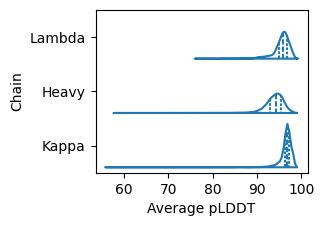

In [72]:
# model confidence
args = {'width_level':1, 'height':6}
fig, ax = Layout(args).one()

PlotPredict(df).violin_plddt(ax)

## 2. PDB raw

### 2.1 relax on RMSD

In [126]:
query = "select * from chain_rmsd where rmsd is not null"
df = QueryComplex().list_data(query, True)
df.head(1)

,pdb_id,chain_id,rmsd,chain_status,native_pdb,model_pdb
0,120L,120L_0_A_0,0.590259,Raw,meta_chain_pdb/12/120L/120L_0_A_0.pdb,chain_alphafold/12/120L/120L_0_A_0/120L_0_A_0_...


figure size: 11.4 x 7 cm


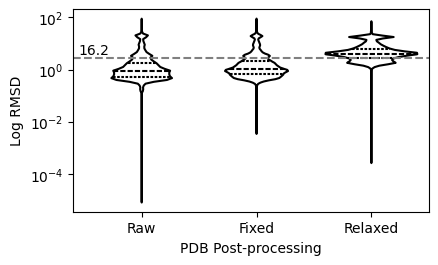

In [141]:
args = {'width_level':2, 'height':7}
fig, ax = Layout(args).one()

PlotPredict(df).violin_pdb_rmsd(ax)
fig.savefig('../figures/RMSD_chain_status.tif', dpi=300, bbox_inches='tight', pad_inches=.05)

### pLDDT vs RMSD

In [76]:
df = LoadData.plddt_rmsd()
df.head(2)

antibody, pdb:  8737
antibody, chains: 29089


,chain_id,rmsd,avg_plddt,allele_name,specie,gene_name,gene_family,chain_type,pdb_id,model_no,...,pro_id,chain_seq,pro_len,release_date,structure_method,resolution,avg_bfactor,relative_faa,chain_pdb,pdb_group
7,3IJH_0_A_0,0.634036,97.7048,IGKV8-21*01,Mus_musculus,IGKV8-21,IGKV8,Kappa,3IJH,0.0,...,143006.0,IVMTQSPSSLAVSAGEKVTMSCKSSQSLLNSRTRKNYLAWYQQKPG...,217.0,2009-10-06,x-ray diffraction,2.1,27.2235,meta_chain_faa/3I/3IJH/3IJH_0_A_0.faa,meta_chain_pdb/3I/3IJH/3IJH_0_A_0.pdb,0.0
8,3IJH_0_B_0,0.942877,95.9109,IGHV7-3*02,Mus_musculus,IGHV7-3,IGHV7,Heavy,3IJH,0.0,...,148148.0,EVMLVESGGGLVQPGNSLRLSCATSGFTFTDYYMSWVRQPPGKALE...,221.0,2009-10-06,x-ray diffraction,2.1,29.0730,meta_chain_faa/3I/3IJH/3IJH_0_B_0.faa,meta_chain_pdb/3I/3IJH/3IJH_0_B_0.pdb,0.0


figure size: 8.5 x 6 cm
intercept=45.42804812092044, slop=-0.4552645518374376
0.95 quantile of avg_plddt is 90.33
0.95 quantile of rmsd is 8.20


<Axes: title={'center': '$R^2$ = 0.10'}, xlabel='Average pLDDT', ylabel='RMSD'>

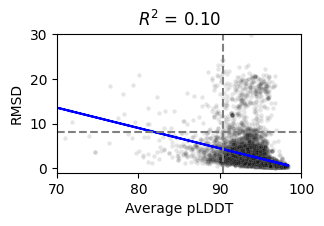

In [87]:
args = {'width_level':1, 'height':6}
fig, ax = Layout(args).one()

chain_type = 'Heavy'
PlotPredict(df).dot_plddt_rmsd(ax, chain_type)

figure size: 8.5 x 6 cm
intercept=72.82921425697528, slop=-0.7325596069320188
0.95 quantile of avg_plddt is 94.03
0.95 quantile of rmsd is 7.33


<Axes: title={'center': '$R^2$ = 0.18'}, xlabel='Average pLDDT', ylabel='RMSD'>

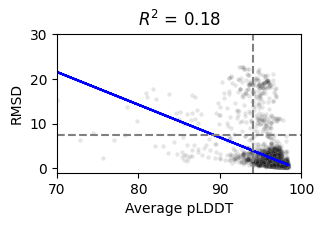

In [88]:
args = {'width_level':1, 'height':6}
fig, ax = Layout(args).one()

chain_type = 'Kappa'
PlotPredict(df).dot_plddt_rmsd(ax, chain_type)

figure size: 8.5 x 6 cm
intercept=87.85930507868176, slop=-0.8707797773098508
0.95 quantile of avg_plddt is 91.25
0.95 quantile of rmsd is 16.06


<Axes: title={'center': '$R^2$ = 0.13'}, xlabel='Average pLDDT', ylabel='RMSD'>

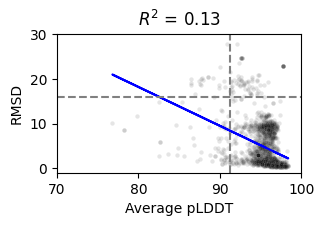

In [89]:
args = {'width_level':1, 'height':6}
fig, ax = Layout(args).one()

chain_type = 'Lambda'
PlotPredict(df).dot_plddt_rmsd(ax, chain_type)

## TM

In [96]:
query = "select * from chain_tmalign where tm1 is not null"
df = QueryComplex(True).list_data(query, True)
df.head(2)

,pdb_id,chain_id,tm1,tm2,rmsd,chain_status,native_pdb,model_pdb
0,3IJH,3IJH_0_A_0,0.9869,0.9869,0.63,Fixed,meta_chain_relaxed/3I/3IJH/3IJH_0_A_0/fixed.pdb,chain_alphafold/3I/3IJH/3IJH_0_A_0/3IJH_0_A_0_...
1,3IJH,3IJH_0_B_0,0.9829,0.9829,0.94,Fixed,meta_chain_relaxed/3I/3IJH/3IJH_0_B_0/fixed.pdb,chain_alphafold/3I/3IJH/3IJH_0_B_0/3IJH_0_B_0_...


figure size: 11.4 x 7 cm


/home/yuan/bio/predict_antibody/src/plot_predict.py:76: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(-.1, 1.4)


<Axes: xlabel='PDB Post-processing', ylabel='TM-align'>

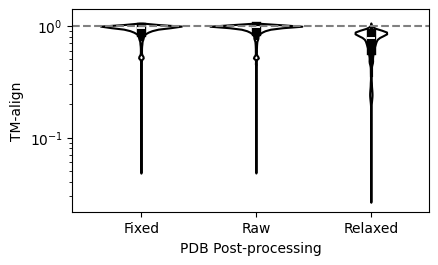

In [97]:
args = {'width_level':2, 'height':7}
fig, ax = Layout(args).one()

PlotPredict(df).violin_pdb_tm(ax)

In [98]:
df = LoadData.plddt_tm()
df.head(2)

antibody, pdb:  8737
antibody, chains: 29089


,chain_id,tm1,rmsd,avg_plddt,allele_name,specie,gene_name,gene_family,chain_type,pdb_id,...,pro_id,chain_seq,pro_len,release_date,structure_method,resolution,avg_bfactor,relative_faa,chain_pdb,pdb_group
0,120L_0_A_0,0.9882,0.52,96.8792,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,220L_0_A_0,0.9872,0.54,96.4314,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


figure size: 8.5 x 6 cm
intercept=-0.9926677646387576, coef=0.019967267347343793
90.31744
0.9893


<Axes: title={'center': '$R^2$ = 0.13'}, xlabel='Average pLDDT', ylabel='TM-align'>

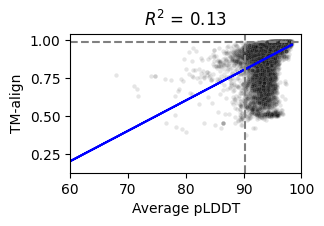

In [100]:
args = {'width_level':1, 'height':6}
fig, ax = Layout(args).one()

chain_type = 'Heavy'
PlotPredict(df).dot_plddt_tm(ax, chain_type)

figure size: 8.5 x 6 cm
intercept=18.68014107253926, coef=-0.18078157450314622
90.31744
3.76


<Axes: xlabel='average pLDDT', ylabel='RMSD'>

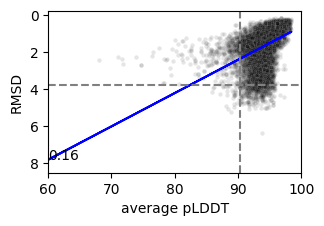

In [102]:
args = {'width_level':1, 'height':6}
fig, ax = Layout(args).one()

chain_type = 'Heavy'
PlotPredict(df).dot_plddt_rmsd2(ax, chain_type)

### figures

In [91]:
chain_status = 'Raw'
df = LoadData.rmsd_confidence(chain_status)
df.head(2)

antibody, pdb:  8737
antibody, chains: 29089


,chain_id,avg_plddt,avg_ptm,max_pae,rmsd,tm1,allele_name,specie,gene_name,gene_family,...,pro_id,chain_seq,pro_len,release_date,structure_method,resolution,avg_bfactor,relative_faa,chain_pdb,pdb_group
188,3IJH_0_A_0,97.7048,0.88,20.5938,0.634036,0.5070,IGKV8-21*01,Mus_musculus,IGKV8-21,IGKV8,...,143006.0,IVMTQSPSSLAVSAGEKVTMSCKSSQSLLNSRTRKNYLAWYQQKPG...,217.0,2009-10-06,x-ray diffraction,2.1,27.2235,meta_chain_faa/3I/3IJH/3IJH_0_A_0.faa,meta_chain_pdb/3I/3IJH/3IJH_0_A_0.pdb,0.0
189,3IJH_0_A_0,97.7048,0.88,20.5938,0.634036,0.5071,IGKV8-21*01,Mus_musculus,IGKV8-21,IGKV8,...,143006.0,IVMTQSPSSLAVSAGEKVTMSCKSSQSLLNSRTRKNYLAWYQQKPG...,217.0,2009-10-06,x-ray diffraction,2.1,27.2235,meta_chain_faa/3I/3IJH/3IJH_0_A_0.faa,meta_chain_pdb/3I/3IJH/3IJH_0_A_0.pdb,0.0


figure size: 17.4 x 12 cm
intercept=50.59423381657698, slope=-0.5091455336458159
intercept=41.50053043114023, slope=-45.58851510685751
intercept=-2.9956031009282125, slope=0.21695015882156277
intercept=15.78934538991042, slope=-15.930176189767693


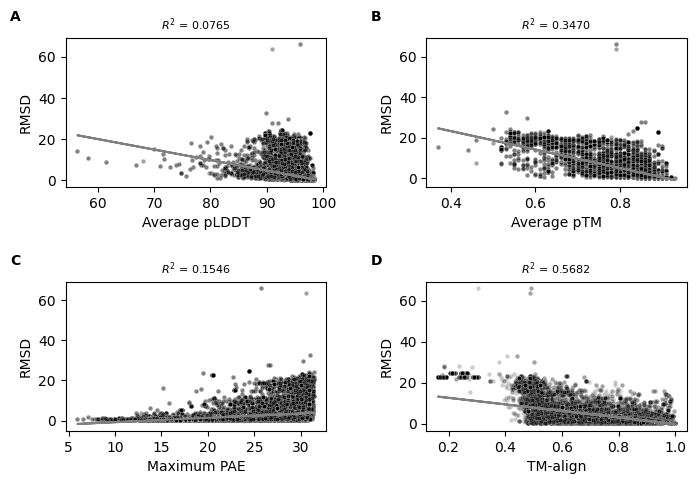

In [92]:
args = {'width_level':3, 'height':12, 'space':.1}
panel_xytext = [(-40,20), ]*4
fig, axes = Layout(args).grid(2,2,panel_xytext)

params = {'col1': 'avg_plddt', 'xlabel':'Average pLDDT', 'col2': 'rmsd', 'ylabel':'RMSD',}
PlotPredict(df).dot(axes[0], params)

params = {'col1': 'avg_ptm', 'xlabel':'Average pTM', 'col2': 'rmsd', 'ylabel':'RMSD',}
PlotPredict(df).dot(axes[1], params)

params = {'col1': 'max_pae', 'xlabel':'Maximum PAE', 'col2': 'rmsd', 'ylabel':'RMSD',}
PlotPredict(df).dot(axes[2], params)

params = {'col1': 'tm1', 'xlabel':'TM-align', 'col2': 'rmsd', 'ylabel':'RMSD',}
PlotPredict(df).dot(axes[3], params)

fig.savefig('../figures/eval_predict_monomer_raw.tif', dpi=300, bbox_inches='tight', pad_inches=.05)

In [93]:
chain_status = 'Relaxed'
df = LoadData.rmsd_confidence(chain_status)
df.head(2)

antibody, pdb:  8737
antibody, chains: 29089


,chain_id,avg_plddt,avg_ptm,max_pae,rmsd,tm1,allele_name,specie,gene_name,gene_family,...,pro_id,chain_seq,pro_len,release_date,structure_method,resolution,avg_bfactor,relative_faa,chain_pdb,pdb_group
0,3IJH_0_A_0,97.7048,0.88,20.5938,12.6926,0.5070,IGKV8-21*01,Mus_musculus,IGKV8-21,IGKV8,...,143006.0,IVMTQSPSSLAVSAGEKVTMSCKSSQSLLNSRTRKNYLAWYQQKPG...,217.0,2009-10-06,x-ray diffraction,2.1,27.2235,meta_chain_faa/3I/3IJH/3IJH_0_A_0.faa,meta_chain_pdb/3I/3IJH/3IJH_0_A_0.pdb,0.0
1,3IJH_0_A_0,97.7048,0.88,20.5938,12.6926,0.5071,IGKV8-21*01,Mus_musculus,IGKV8-21,IGKV8,...,143006.0,IVMTQSPSSLAVSAGEKVTMSCKSSQSLLNSRTRKNYLAWYQQKPG...,217.0,2009-10-06,x-ray diffraction,2.1,27.2235,meta_chain_faa/3I/3IJH/3IJH_0_A_0.faa,meta_chain_pdb/3I/3IJH/3IJH_0_A_0.pdb,0.0


figure size: 17.4 x 12 cm
intercept=59.779415693465694, slope=-0.5880645414503818
intercept=47.53424172243121, slope=-50.64801165143357
intercept=-3.13494527146502, slope=0.29539178554817885
intercept=15.859934701770731, slope=-14.140561419826604


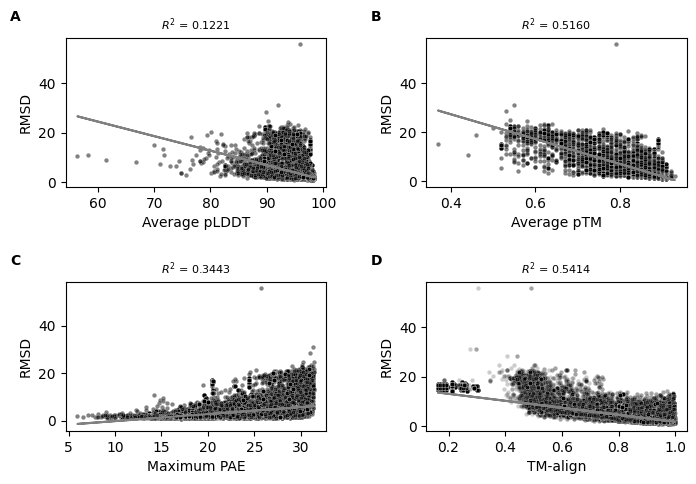

In [94]:
args = {'width_level':3, 'height':12, 'space':.1}
panel_xytext = [(-40,20),] * 4
fig, axes = Layout(args).grid(2,2,panel_xytext)

params = {'col1': 'avg_plddt', 'xlabel':'Average pLDDT', 'col2': 'rmsd', 'ylabel':'RMSD',}
PlotPredict(df).dot(axes[0], params)

params = {'col1': 'avg_ptm', 'xlabel':'Average pTM', 'col2': 'rmsd', 'ylabel':'RMSD',}
PlotPredict(df).dot(axes[1], params)

params = {'col1': 'max_pae', 'xlabel':'Maximum PAE', 'col2': 'rmsd', 'ylabel':'RMSD',}
PlotPredict(df).dot(axes[2], params)

params = {'col1': 'tm1', 'xlabel':'TM-align', 'col2': 'rmsd', 'ylabel':'RMSD',}
PlotPredict(df).dot(axes[3], params)

fig.savefig('../figures/eval_predict_monomer_relax.tif', dpi=300, bbox_inches='tight', pad_inches=.05)

figure size: 17.4 x 6 cm
0.95 quantile of chain_type is 92.7354
0.95 quantile of chain_type is 0.81
0.95 quantile of chain_type is 0.5406


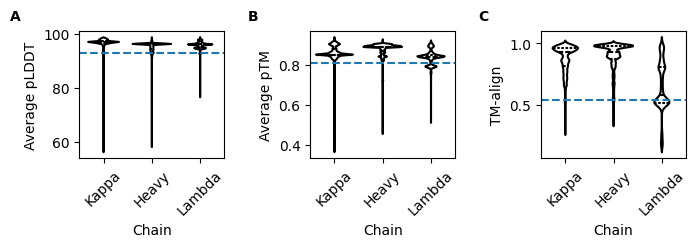

In [123]:
args = {'width_level': 3, 'height': 6,}
label_x = (-50,-45,-45)
label_y = 16
fig, axes = Layout(args).row(label_x, label_y)

basic = {'colx':'chain_type', 'xlabel': 'Chain'}
params = {'coly':'avg_plddt', 'ylabel': 'Average pLDDT',}
params.update(basic)
PlotPredict(df).violin(axes[0], params)

params = {'coly':'avg_ptm', 'ylabel': 'Average pTM',}
params.update(basic)
PlotPredict(df).violin(axes[1], params)

params = {'coly':'tm1', 'ylabel': 'TM-align',}
params.update(basic)
PlotPredict(df).violin(axes[2], params)

fig.savefig('../figures/eval_predict_monomer_hist.tif', dpi=300, bbox_inches='tight', pad_inches=.05)